In [86]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pds
import seaborn as sns
import numpy as np
import random
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from scipy import stats
#import graphviz
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [87]:
#df = sns.load_dataset('iris') # load a pandas dataframe from demo file
df = pds.read_csv('./weather.csv', sep=",") # load a pandas dataframe from csv
df.head()


,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [88]:
df1 = df.drop(['Wind_Speed','Cloud_Cover'],axis=1)

In [89]:
df1.head()

,Temperature,Humidity,Pressure,Rain
0,23.720338,89.592641,1032.378759,rain
1,27.879734,46.489704,992.614190,no rain
2,25.069084,83.072843,1007.231620,no rain
3,23.622080,74.367758,982.632013,rain
4,20.591370,96.858822,980.825142,no rain


### Preprocessing: Équilibrage des classes 'rain' et 'no rain'

In [90]:
# Compter le nombre de lignes où 'Rain' est égal à 'no rain'
no_rain_count = len(df1[df1['Rain'] == 'no rain'])
rain_count = len(df1[df1['Rain'] == 'rain'])
# Affichage du nombre de lignes 'no rain'
print(no_rain_count, rain_count)

2186 314


#### Undersampling : 

In [91]:
# Supposons que votre DataFrame s'appelle df

# Sélectionner aléatoirement 1700 lignes où 'Rain' est égal à 'no rain'
df1_no_rain = df1[df1['Rain'] == 'no rain'].sample(n=1800, random_state=42)

# Supprimer ces 1700 lignes de 'no rain' du DataFrame original
df_balanced = df1.drop(df1_no_rain.index)

# Vérification du nouveau nombre de lignes
no_rain_count_balanced = len(df_balanced[df_balanced['Rain'] == 'no rain'])
rain_count_balanced = len(df_balanced[df_balanced['Rain'] == 'rain'])

print(no_rain_count_balanced, rain_count_balanced)

df2=df_balanced

386 314


In [92]:
classes = df.loc[:,"Rain"]
# Réduire la taille de 'classes' pour qu'elle corresponde à 'dff'
classes = classes.sample(n=df.shape[0], random_state=10)

### Preprocessing:Encodage de la  variable catégorique 'Rain'

In [93]:
classes=df2['Rain'].map({'rain':1, 'no rain':0})
df2=df2.drop(['Rain'], axis=1)

In [94]:
print(df2.shape)  # Affiche les dimensions de dff
print(classes.shape)  # Affiche les dimensions de classes

(700, 3)
(700,)


In [95]:
print(classes.unique())

[1 0]


___

In [96]:
#X_train, X_test, y_train, y_test = train_test_split(dff, classes, train_size=0.66)
X_train, X_test, y_train, y_test = train_test_split(df2, classes, test_size=0.33, random_state=10)

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(10, 200),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=10),
                                   param_distributions=param_dist,
                                   n_iter=20,  # Nombre d'essais aléatoires
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1)
random_search.fit(X_train, y_train)
print("Meilleurs paramètres :", random_search.best_params_)

Meilleurs paramètres : {'criterion': 'entropy', 'min_samples_leaf': 4, 'n_estimators': 67}


In [63]:
type(X_train)
# Vérifier les types des colonnes
print(X_train.dtypes)

Temperature    float64
Humidity       float64
Pressure       float64
dtype: object


In [137]:
model = ensemble.RandomForestClassifier(n_estimators= 37 , max_depth= 5, criterion = 'entropy', random_state=10,
                                        min_samples_leaf=7,bootstrap=True)

In [138]:
model.fit(X_train, y_train)
sortedLabelList = sorted(list(set(classes)))
print(sortedLabelList)
y_predict_train = model.predict(X_train)
metrics.confusion_matrix(y_true=y_train, y_pred=y_predict_train, labels=sortedLabelList)


[0, 1]


array([[216,  40],
       [  0, 213]])

In [139]:
y_predict = model.predict(X_test)
print(y_predict[0:5])
print(metrics.accuracy_score(y_test, y_predict))

[0 0 0 0 0]
0.9134199134199135


In [140]:
sortedLabelList = sorted(list(set(classes)))
metrics.confusion_matrix(y_true=y_test, y_pred=y_predict, labels=sortedLabelList)

array([[110,  20],
       [  0, 101]])

In [130]:
sortedLabelList

[0, 1]

In [131]:
pds.DataFrame(
    metrics.confusion_matrix(y_true=y_test, y_pred=y_predict, labels=sortedLabelList),
    columns=['Predicted ' + str(className) for className in sortedLabelList],
    index=['True ' + str(className) for className in sortedLabelList]
)

,Predicted 0,Predicted 1
True 0,110,20
True 1,0,101


In [132]:
print(metrics.classification_report(y_test, y_predict))  

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       130
           1       0.83      1.00      0.91       101

    accuracy                           0.91       231
   macro avg       0.92      0.92      0.91       231
weighted avg       0.93      0.91      0.91       231



In [133]:
pds.DataFrame(model.predict_proba(X_test),
    columns=['Predicted ' + str(className) for className in sortedLabelList]).head(10)

,Predicted 0,Predicted 1
0,0.675009,0.324991
1,0.921317,0.078683
2,0.858607,0.141393
3,0.990689,0.009311
4,0.885994,0.114006
5,0.910057,0.089943
6,0.224026,0.775974
7,0.272411,0.727589
8,0.278588,0.721412
9,0.435647,0.564353


NameError: name 'X' is not defined

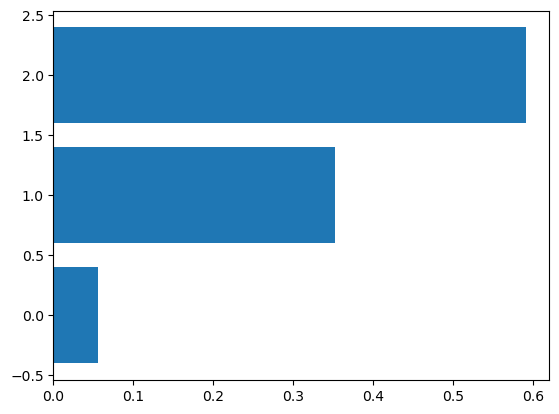

In [134]:
##Importance des variables (Feature Importance)

import matplotlib.pyplot as plt
import pandas as pd

feature_importances = model.feature_importances_
sorted_idx = feature_importances.argsort()
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Importance des variables")
plt.show()

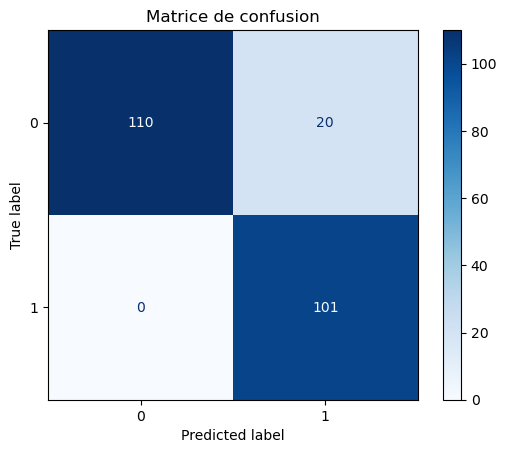

In [135]:
##confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=sortedLabelList, cmap='Blues')
plt.title("Matrice de confusion")
plt.show()

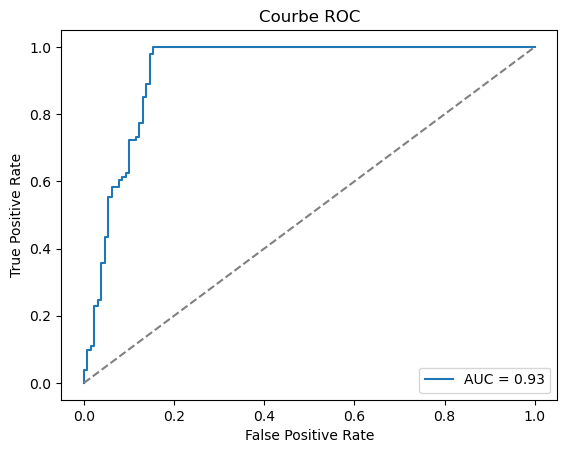

In [136]:
## Graphique ROC et AUC (Receiver Operating Characteristic)

from sklearn.metrics import roc_curve, roc_auc_score

y_predict = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
auc = roc_auc_score(y_test, y_predict)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend()
plt.show()

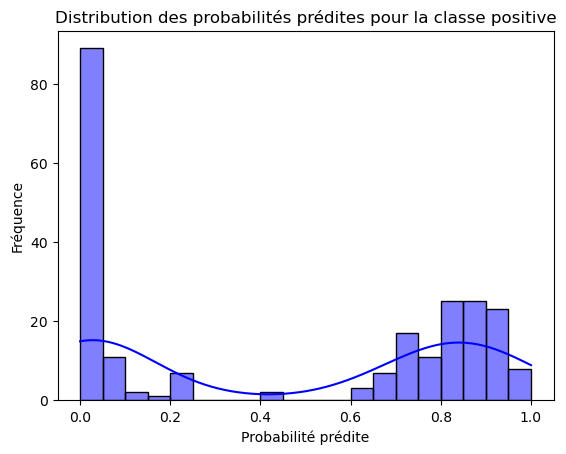

In [79]:
##Distribution des prédictions (Probability Distribution)

import seaborn as sns

y_proba = model.predict_proba(X_test)
sns.histplot(y_proba[:, 1], kde=True, bins=20, color='blue')
plt.title("Distribution des probabilités prédites pour la classe positive")
plt.xlabel("Probabilité prédite")
plt.ylabel("Fréquence")
plt.show()

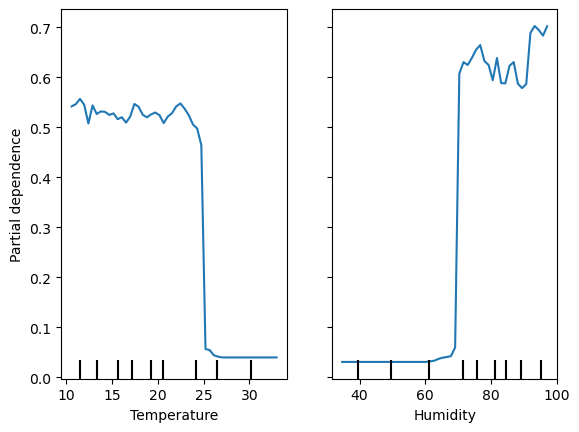

In [80]:
##Visualisation de l’erreur en fonction des variables (Partial Dependence Plot)

from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(model, X_test, [0, 1], grid_resolution=50)
plt.show()

In [84]:
# Courbe d’apprentissage (Learning Curve)

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train score")
plt.plot(train_sizes, test_mean, label="Validation score")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.title("Courbe d'apprentissage")
plt.legend()
plt.show()

NameError: name 'X' is not defined